In [23]:
pip install opencv-python pytesseract numpy matplotlib

In [24]:
!sudo apt update
!sudo apt install tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
35 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [25]:
from IPython import get_ipython
from IPython.display import display
# %%
# Install necessary libraries. Note: pytesseract requires the Tesseract OCR engine to be installed separately.
# We'll install it on the Linux system using apt below.
!pip install opencv-python pytesseract numpy matplotlib
# %%
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# (Optional) Path to tesseract.exe
# Update the path to the Tesseract executable on your Linux system.
# Tesseract is typically installed at /usr/bin/tesseract on Linux.
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


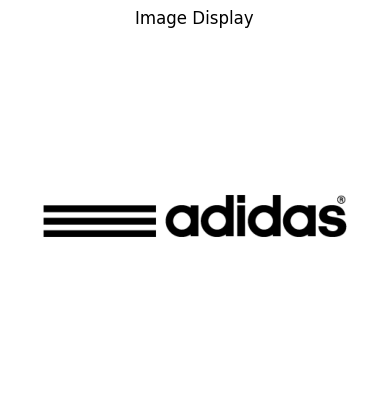

In [30]:
# Load logo image
image = cv2.imread('adidas.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.title("Image Display")
plt.axis('off')  # Hide axis
plt.show()

In [14]:
# 1. Edge Detection
edges = cv2.Canny(gray, 100, 200)

In [15]:
# 2. Feature Detection using ORB
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)
image_kp = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0))

In [16]:
# 3. Text Detection using OCR
boxes = pytesseract.image_to_boxes(gray)

In [17]:
# Create copy for annotation
img_with_text = image.copy()
h, w = gray.shape

print("Detected Text Bounding Boxes with Coordinates and θ:")

for b in boxes.splitlines():
    b = b.split()
    if len(b) == 6:
        char, x1, y1, x2, y2, _ = b
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        y1 = h - y1
        y2 = h - y2
        cv2.rectangle(img_with_text, (x1, y2), (x2, y1), (0, 255, 0), 1)
        cv2.putText(img_with_text, char, (x1, y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

         # Compute θ (angle) using bounding box slope
        dx = x2 - x1
        dy = y1 - y2
        theta = np.degrees(np.arctan2(dy, dx))
        print(f"Char: {char}, X: {x1}, Y: {y2}, θ: {theta:.2f}°")

Detected Text Bounding Boxes with Coordinates and θ:
Char: =, X: 46, Y: 241, θ: 15.75°
Char: a, X: 215, Y: 227, θ: 67.52°
Char: d, X: 215, Y: 241, θ: 43.73°
Char: i, X: 264, Y: 227, θ: 51.58°
Char: d, X: 314, Y: 227, θ: 43.56°
Char: a, X: 339, Y: 227, θ: 36.99°
Char: s, X: 378, Y: 228, θ: 32.93°


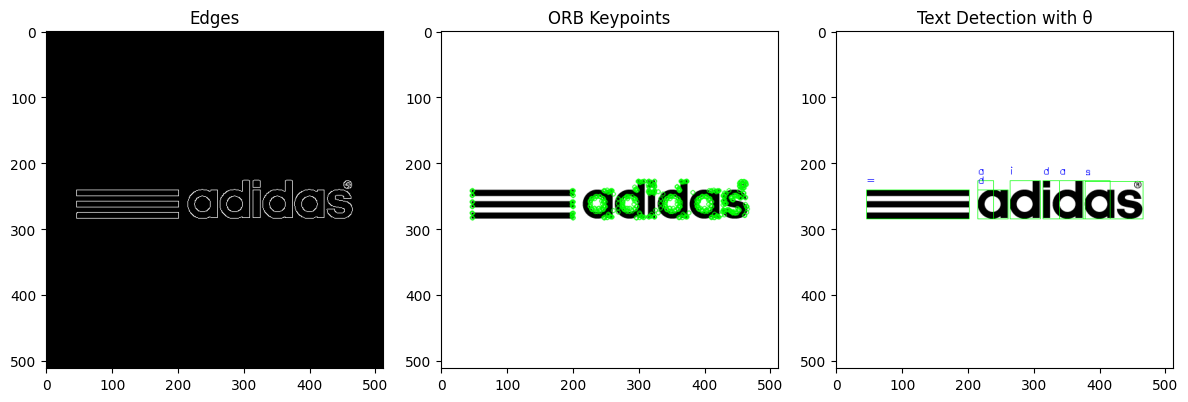

In [18]:
# Display results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1,3,2)
plt.title("ORB Keypoints")
plt.imshow(cv2.cvtColor(image_kp, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.title("Text Detection with θ")
plt.imshow(cv2.cvtColor(img_with_text, cv2.COLOR_BGR2RGB))


plt.tight_layout()
plt.show()